In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Algerian_cleaned_dataset.csv")
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df=df.drop(['day','month','year'],axis=1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region'],
      dtype='object')

In [7]:
# Strip any leading/trailing spaces from column names first
df.columns = df.columns.str.strip()

# Now proceed with the transformation
df['Classes'] = df['Classes'].str.strip().str.lower().replace({'not fire': 0, 'fire': 1}).astype(int)
df.head()


C:\Users\yash patel\AppData\Local\Temp\ipykernel_42096\3800782074.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Classes'] = df['Classes'].str.strip().str.lower().replace({'not fire': 0, 'fire': 1}).astype(int)


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [8]:
from sklearn.model_selection import train_test_split
X=df.drop('FWI',axis=1)
y=df['FWI']
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<Axes: >

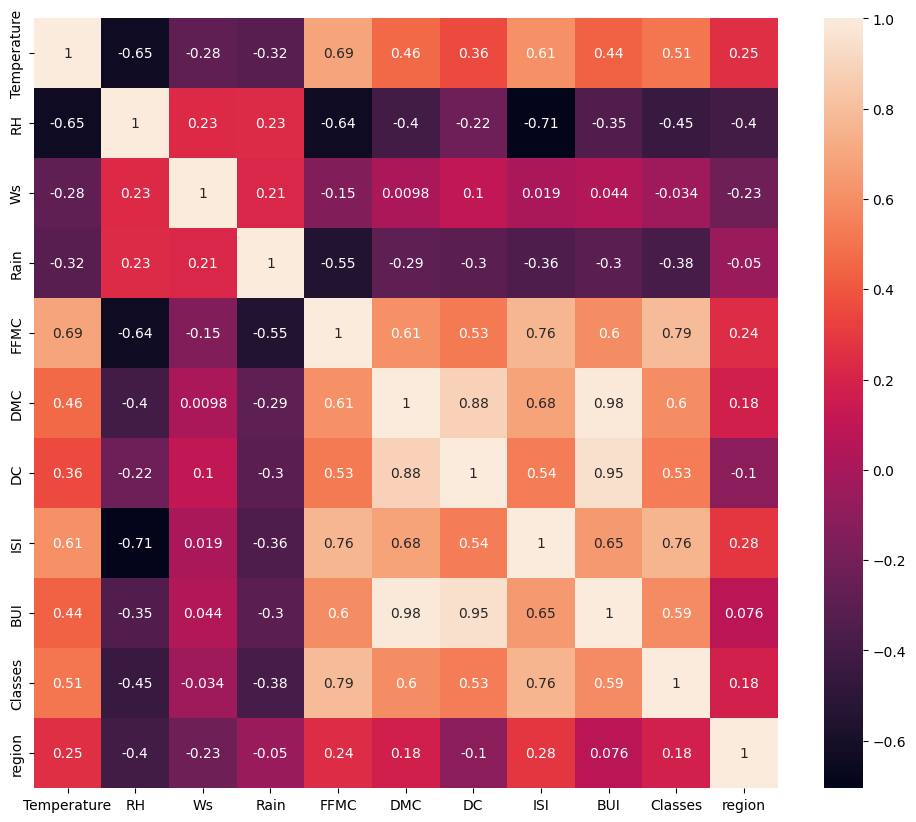

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [11]:
X_train.columns
X_train=X_train.drop(['BUI','DC'],axis=1)
X_test=X_test.drop(['BUI','DC'],axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
print(X_train.shape)
print(X_test.shape)

(193, 9)
(49, 9)


## Linear regression

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("The MAE for linear regeression:",mae)
print("The MSE for linear regeression:",mse)
print("The R2 score for linear regeression:",r2)

The MAE for linear regeression: 0.5545045856094398
The MSE for linear regeression: 0.7359768783886136
The R2 score for linear regeression: 0.9808307543897844


## Lasso regression

In [15]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regression = Lasso()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("The MAE for lasso:",mae)
print("The MSE for lasso:",mse)
print("The R2 score for lasso:",r2)

The MAE for lasso: 1.032320779226458
The MSE for lasso: 1.9841495866379397
The R2 score for lasso: 0.9483208618768766


## Ridge regression

In [16]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regression = Ridge()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("The MAE for Ridge:",mae)
print("The MSE for Ridge:",mse)
print("The R2 score for Ridge:",r2)

The MAE for Ridge: 0.5745779512432263
The MSE for Ridge: 0.7690443781158961
The R2 score for Ridge: 0.9799694786587101


## Elastic Net regression

In [17]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regression = ElasticNet()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("The MAE for elastic net:",mae)
print("The MSE for elastic net:",mse)
print("The R2 score for elastic net:",r2)

The MAE for elastic net: 1.7761304569194039
The MSE for elastic net: 5.180810059628073
The R2 score for elastic net: 0.8650606786583765


## Lasso cross validation code

In [19]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train,y_train)

LassoCV(cv=5)

In [20]:
y_pred = lassocv.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("The MAE for elastic net:",mae)
print("The MSE for elastic net:",mse)
print("The R2 score for elastic net:",r2)

The MAE for elastic net: 0.6289653018270837
The MSE for elastic net: 0.8397581177140993
The R2 score for elastic net: 0.9781276693815726


## Pickle the model 

In [21]:
# We will pickle the linear regression model and the scaler model
import pickle 
pickle.dump(scaler,open('scaler.pkl','wb'))

pickle.dump(regression,open('regression.pkl','wb'))